# Demo: Sampling with LoRA in Diffusion Models

Sample with vanilla Stable Diffusion.


100%|██████████| 50/50 [00:04<00:00, 11.50it/s]


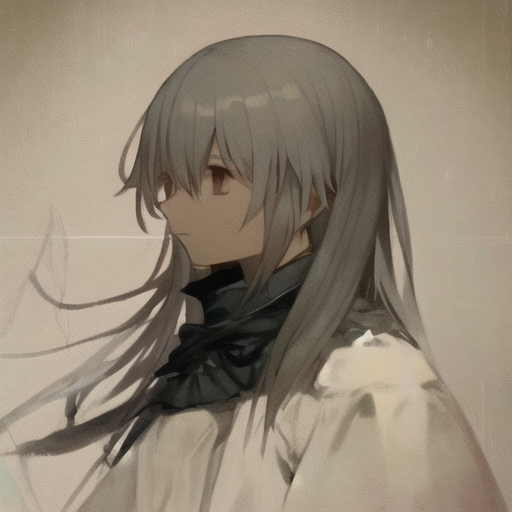

In [16]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler, StableDiffusionImg2ImgPipeline
import torch
import sys
import time
sys.path.insert(0, sys.path[0]+"/../")


# model_id = "../stable-diffusion/novelai"
model_id = "../stable-diffusion/novelai"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

prompt = "a photo of a sks person"
torch.manual_seed(time.time())
image = pipe(prompt, num_inference_steps=50, guidance_scale=7, height=512,width=512).images[0]

image  # nice. diffusers are cool.


Sample with LoRA in Stable Diffusion

In [19]:
from lora_diffusion import tune_lora_scale, patch_pipe
torch.manual_seed(time.time())

# The directory of LoRA
LORA_OUTPUT_DIR = None

# necessary for outputing attack performance
def dummy(images, **kwargs):
    return images, [False] * images.shape[0]
pipe.safety_checker = None 

patch_pipe(
    pipe,
    # "../output/lora/sd1-5_adv/painting/lora_weight.safetensors",
    # "../output/lora/sd1-5_adv/kent/lora_weight.safetensors",
    # "../output/lora/sd1-5/kent/lora_weight.safetensors",
    "../output/lora/sd1-5_adv/param/5_30_10_lunet/lora_weight.safetensors",
    # "../output/lora/sd1-5_adv/sangdelan/5_30_10_lunet/lora_weight.safetensors",
    # "../output/lora/sd1-5/sangdelan/lora_weight.safetensors",
    patch_text=True,
    patch_ti=False,
    patch_unet=True,
)

tune_lora_scale(pipe.unet, 0.75)
tune_lora_scale(pipe.text_encoder, 1.0)
# prompt = 'a painting of a sks person, high quality, masterpiece'
prompt = 'a painting of a sks person in dress, high quality, masterpiece'
image = pipe(prompt, num_inference_steps=50, guidance_scale=7, height=512,width=512).images[0]
image.save("../output/lora_output_example.jpg")
image


FileNotFoundError: No such file or directory: "../output/lora/sd1-5_adv/param/5_30_10_lunet/lora_weight.safetensors"